#    1. Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan *objective* yang ingin dicapai.

- Nama : Fahmi Suwandhi
- Batch : 10

# 2. Import Libraries

> *Cell* pertama pada *notebook* **harus berisi dan hanya berisi** semua *library* yang digunakan dalam *project*.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Library Input missing Value
from sklearn.impute import SimpleImputer

# Handling outlier
from feature_engine.outliers import Winsorizer

# Library Splitting Data
from sklearn.model_selection import train_test_split

# Feature Encoding
from sklearn.preprocessing import LabelEncoder

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Feature Encoding using OneHoTEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Features Model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.cluster import KMeans


# Metrics
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

# Cross Validation
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning : Grid Search
from sklearn.model_selection import GridSearchCV

# PCA
from sklearn.decomposition import PCA, FactorAnalysis

# 3. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
df = pd.read_csv('CC GENERAL.csv')
print(df.shape)
df.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


- Exp :
> kita dapat melihat ukuran dari data kita memiliki 8950 baris dan 18 kolom

In [3]:
# Copy dataset original kedalam variabel df_copy
df_ori = df.copy()

# 4. Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

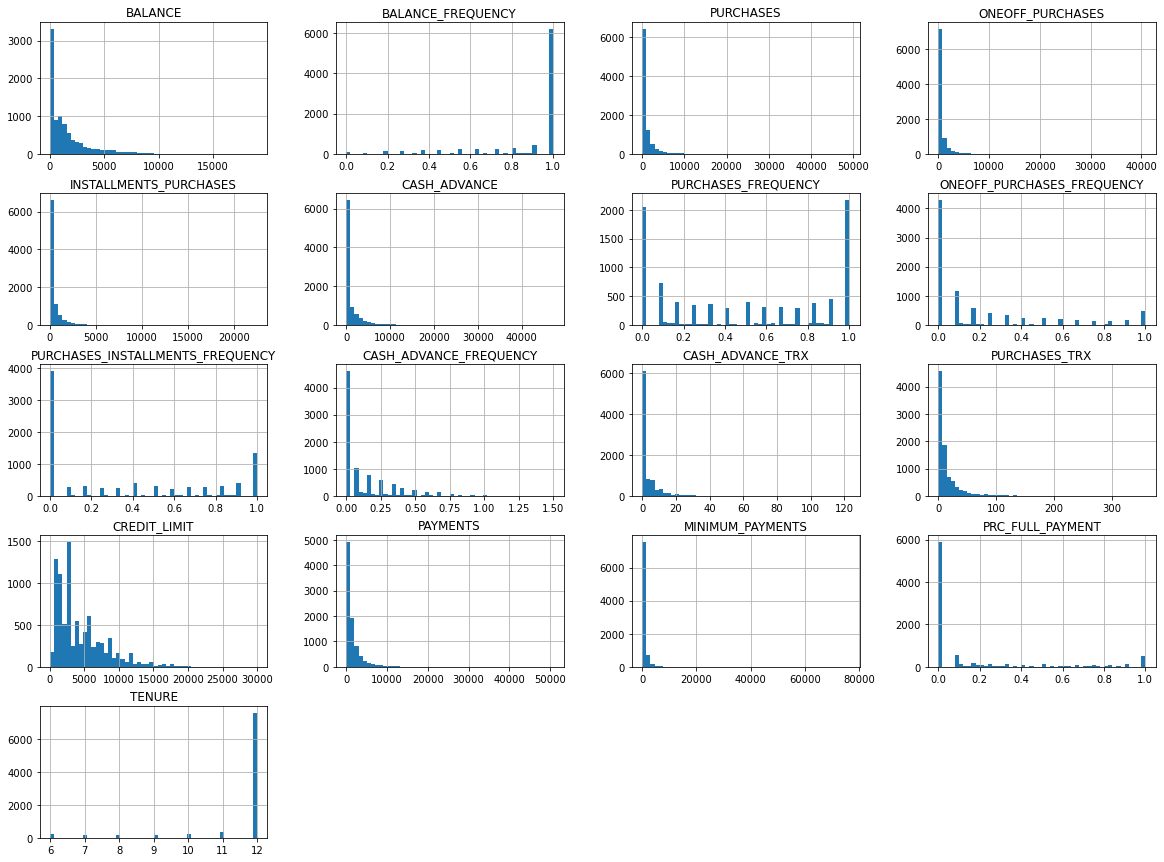

In [5]:
# Visualisasi persebaran data setiap columns
%matplotlib inline
import matplotlib.pyplot as plt
df.select_dtypes(include=np.number).hist(bins=50, figsize=(20,15))

plt.show()

# 5. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

#### 5.1 Data Inference

In [6]:
# Mengambil data inference dari data set
df_inf = df.sample(10, random_state=9)

# Remove Inference-Set dari Dataset

df_rem = df.drop(df_inf.index)
df_rem

# Reset Index 
df_rem.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10061,5493.904060,1.000000,229.00,0.00,229.00,970.591332,0.416667,0.000000,0.333333,0.333333,4,6,6000.0,2110.557023,1895.026170,0.000000,12
1,C16127,18.105265,1.000000,244.92,0.00,244.92,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2500.0,221.798291,179.182583,0.333333,12
2,C13555,2075.637866,0.454545,0.00,0.00,0.00,4573.876388,0.000000,0.000000,0.000000,0.083333,1,0,7500.0,1146.220278,1448.097316,0.000000,12
3,C14524,0.000000,0.000000,18.77,0.00,18.77,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,5000.0,0.000000,NaN,0.000000,12
4,C12878,58.142915,0.400000,0.00,0.00,0.00,151.730077,0.000000,0.000000,0.000000,0.100000,1,0,1200.0,79.965023,136.403124,0.000000,10
5,C13604,1765.502751,1.000000,2129.44,2129.44,0.00,506.593406,0.500000,0.500000,0.000000,0.083333,2,6,4450.0,1893.259541,472.608761,0.000000,12
6,C12262,1543.194492,1.000000,160.00,160.00,0.00,2956.595415,0.083333,0.083333,0.000000,0.250000,4,1,3000.0,692.776517,389.635310,0.000000,12
7,C18145,490.160040,1.000000,3530.93,2416.31,1114.62,0.000000,1.000000,0.750000,0.666667,0.000000,0,23,4000.0,2959.200535,219.112899,0.000000,12
8,C11418,1064.037564,0.900000,55.52,0.00,55.52,0.000000,0.400000,0.000000,0.300000,0.000000,0,4,4000.0,2427.690302,717.747014,0.000000,10
9,C16676,1530.510830,1.000000,0.00,0.00,0.00,485.900288,0.000000,0.000000,0.000000,0.125000,1,0,5000.0,476.347690,317.958715,0.000000,8


#### 5.2 Handling Missing value

In [7]:
# Kita akan drop kolom cust id karena tipe datanya object, untuk clustering lebih optimal jika tipe datanya numerik
df_rem.drop(columns='CUST_ID', inplace=True)

In [8]:
# Cek Missing value
df_rem.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    312
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# Mengisi kolom Missing pada tipe data object pada X_train
imputer = SimpleImputer(strategy="median")
imputer.fit(df_rem)
X = imputer.transform(df_rem)

df_mv = pd.DataFrame(X, columns=df_rem.columns, index=df_rem.index)
print (df_mv.shape)
df_mv.isnull().sum()

(8940, 17)


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

- Exp :
> Handling missing value menggunakan median dikarenakan distribusi data nya skewed

In [10]:
df_mv.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.096808,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


#### 5.3 Cek outlier

In [11]:
#Cek Skewness
skew1 = []
for i in df_mv.columns:
    skew1.append(abs(df_mv[i].skew()))

# Visualisasi ke data frame
df_skew1 = pd.DataFrame({'Kolom':df_mv.columns, 'Skewness_abs':skew1})
df_skew1['normal'] = df_skew1.Skewness_abs.apply(lambda x: True if x<=0.5 else False)
df_skew1

,Kolom,Skewness_abs,normal
0,BALANCE,2.393435,False
1,BALANCE_FREQUENCY,2.024101,False
2,PURCHASES,8.143330,False
3,ONEOFF_PURCHASES,10.044117,False
4,INSTALLMENTS_PURCHASES,7.296667,False
5,CASH_ADVANCE,5.167395,False
6,PURCHASES_FREQUENCY,0.059432,True
7,ONEOFF_PURCHASES_FREQUENCY,1.535422,False
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.508489,False
9,CASH_ADVANCE_FREQUENCY,1.828058,False


- Exp :
    > kolom yang mempunyai distribusi normal hanya PURCHASES_FREQUENCY dan kolom lain nya skew

In [12]:
# Cek Persentasi untuk kolom yg terdistribusi normal
percent_outliers1 = []
for i in ['PURCHASES_FREQUENCY']:
    std = df_mv[i].std()
    upper = df_mv[i].mean() + 3*std
    lower = df_mv[i].mean() - 3*std
    percent = len(df_mv[(df_mv[i]>upper)|(df_mv[i]<lower)])*100/len(df_mv)
    percent_outliers1.append(percent)

# Visualisasi ke Data Frame
pd.DataFrame({'Kolom':['PURCHASES_FREQUENCY'], 'persentasi_outlier':percent_outliers1})

,Kolom,persentasi_outlier
0,PURCHASES_FREQUENCY,0.0


- Exp :
    > Jumlah outlier pada kolom cons.price.idx dan cons.conf.idx 0%

In [13]:
# Cek Persentasi untuk kolom yg terdistribusi skewed
percent_outliers2 = []
num = 3
for i in ['BALANCE', 'BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']:
    q1 = np.quantile(df_mv[i], 0.25)
    q3 = np.quantile(df_mv[i], 0.75)
    iqr = q3 - q1
    upper1 = q3 + num*iqr
    lower1 = q1 - num*iqr
    percent = len(df_mv[(df_mv[i]>upper1)|(df_mv[i]<lower1)])*100/len(df_mv)
    percent_outliers2.append(percent)

# Visualisasi ke Data Frame
pd.DataFrame({'Kolom':['BALANCE', 'BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE'], 'persentasi_outlier':percent_outliers2})

,Kolom,persentasi_outlier
0,BALANCE,2.170022
1,BALANCE_FREQUENCY,13.199105
2,PURCHASES,4.373602
3,ONEOFF_PURCHASES,6.319911
4,INSTALLMENTS_PURCHASES,4.418345
5,CASH_ADVANCE,5.425056
6,ONEOFF_PURCHASES_FREQUENCY,0.000000
7,PURCHASES_INSTALLMENTS_FREQUENCY,0.000000
8,CASH_ADVANCE_FREQUENCY,0.749441
9,CASH_ADVANCE_TRX,4.116331


In [14]:
# Outlier pada kolom TENURE 
num = 3
q1 = np.quantile(df_mv['TENURE'], 0.25)
q3 = np.quantile(df_mv['TENURE'], 0.75)
iqr = q3 - q1
upper1 = q3 + num*iqr
lower1 = q1 - num*iqr
df_mv[(df_mv['TENURE']>upper1)|(df_mv['TENURE']<lower1)]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
16,2072.074354,0.875000,0.00,0.00,0.00,2784.274703,0.000000,0.000000,0.000000,0.250000,3.0,0.0,3000.0,391.974562,376.579631,0.00,8.0
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4.0,0.0,6000.0,1422.726707,1657.002877,0.00,11.0
36,7427.076941,1.000000,0.00,0.00,0.00,8873.375046,0.000000,0.000000,0.000000,0.727273,11.0,0.0,9000.0,1636.361601,1986.843608,0.00,11.0
46,474.447149,0.500000,109.74,0.00,109.74,1013.659552,0.375000,0.000000,0.250000,0.125000,1.0,3.0,1700.0,176.013005,147.199792,0.00,8.0
50,4931.331857,1.000000,901.42,646.07,255.35,8530.648614,0.625000,0.375000,0.250000,0.875000,37.0,9.0,12000.0,8113.297346,1012.415961,0.00,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.50,6.0
8936,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,312.096808,0.00,6.0
8937,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.25,6.0
8938,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.25,6.0


- Exp : 
    > Jumlah Outlier pada kolom TENURE 1363 baris

In [15]:
# Melakukan capping terhadap outlier skewed
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['BALANCE', 'BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE'])

# Melakukan capping terha
windsoriser.fit(df_mv)

df_out = windsoriser.transform(df_mv)

print (df_mv.shape)
print (df_out.shape)

(8940, 17)
(8940, 17)


#### 5.4 Feature Selection

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

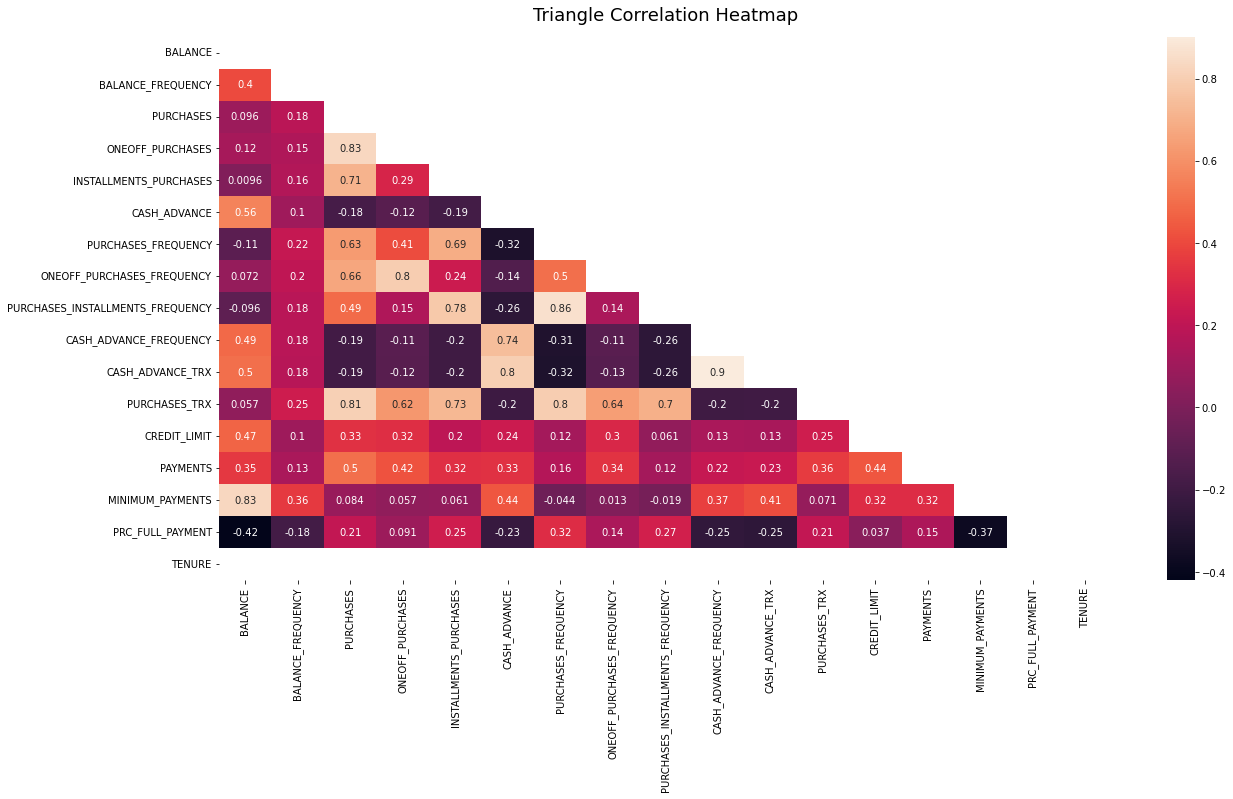

In [16]:
# Feature Selection
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(df_out.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_out.corr(), annot=True, mask=mask)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

- Exp : 
    > untuk Kolom BALANCE Mempunyai tingkat kolerasi yang kuat terhadap kolom : CASH_ADVACE, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, MINIMUM_PAYMENT
    > untuk Kolom BALANCE_FREQUENCY tidak Mempunyai tingkat kolerasi yang kuat terhadap  setiap kolom
    > untuk Kolom PURCHASE Mempunyai tingkat kolerasi yang kuat terhadap kolom : ONEOFF_PURCHASE, INSTALLMENT_PURCHASE, PURCHASE_FREQUENCY, ONEOFF_PURCHASE_FREQUENCY, PURCHASE_TRX

- Exp :
    > Jika dilihat dari tingkat kolerasinya dataset ini saya akan bagi menjadi 2 kelompok, "BALANCE" dan "PURCHASE"

In [17]:
# Inisiasi kolom Balance dan Purchase
balance = ["BALANCE","CASH_ADVANCE","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX","MINIMUM_PAYMENTS"]
purchase = ['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_TRX']

# Membagi kolom Balance dan Purchase
df_balance = df_out[balance]
df_purchase = df_out[purchase]


#### 5.5 Scaling

In [18]:
# Scalling Dataset
scaler = StandardScaler()
df_bal_scal = scaler.fit_transform(df_balance)
df_pur_scal = scaler.fit_transform(df_purchase)


#### 6. PCA

#### 6.1 Define PCA

In [19]:
# define PCA
# PCA data Balance
pca_bal = PCA()
pca_bal.fit(df_bal_scal)

# PCA data Purchase
pca_pur = PCA()
pca_pur.fit(df_pur_scal)

PCA()

In [20]:
# Melihat berapa variance yang dijelaskan oleh masing-masing variabel Balance
pca_bal.explained_variance_ratio_

array([0.68665439, 0.21045704, 0.05379807, 0.03159622, 0.01749428])

In [21]:
# Melihat berapa variance yang dijelaskan oleh masing-masing variabel Purchase
pca_pur.explained_variance_ratio_

array([0.71397665, 0.19201635, 0.05727362, 0.02884446, 0.00788891])

#### 6.2 Ploting Variance PCA

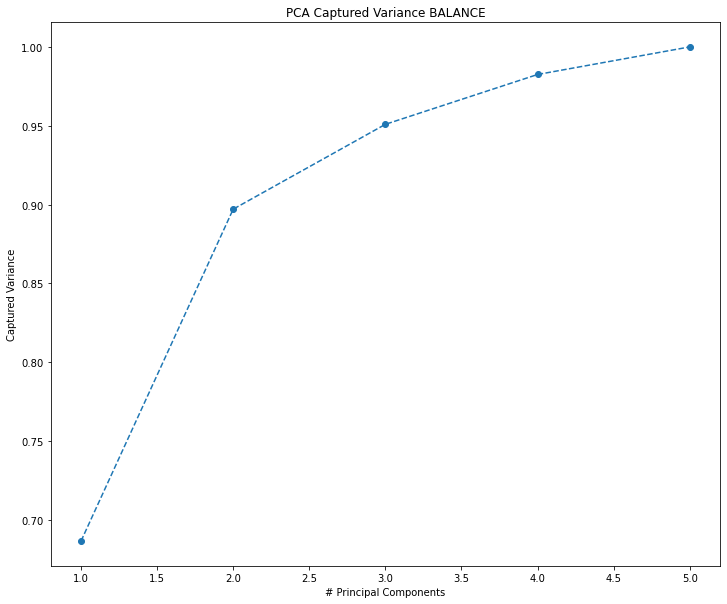

In [22]:
# Plotting the explained_variance_ratio dari masing-masing variabel
plt.figure(figsize=(12,10))
plt.plot(range(1, 6), pca_bal.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', )
plt.title('PCA Captured Variance BALANCE')
plt.xlabel('# Principal Components')
plt.ylabel('Captured Variance')
plt.show()

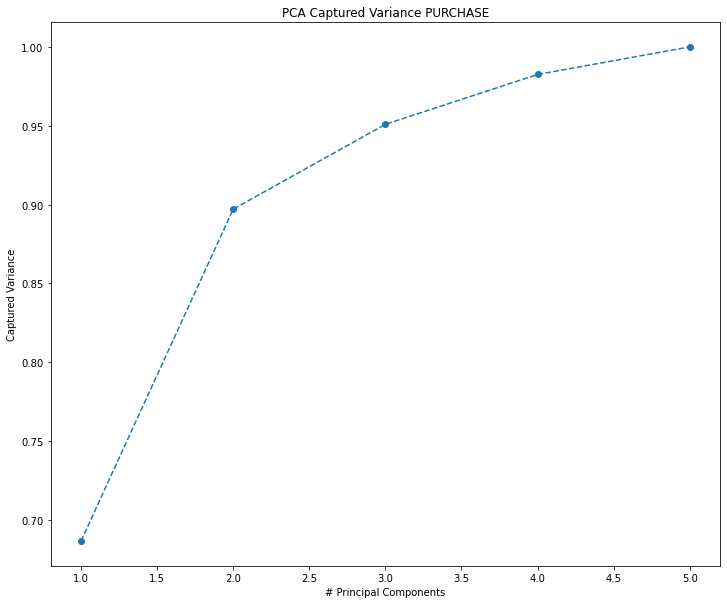

In [23]:
# Plotting the explained_variance_ratio dari masing-masing variabel
plt.figure(figsize=(12,10))
plt.plot(range(1, 6), pca_bal.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', )
plt.title('PCA Captured Variance PURCHASE')
plt.xlabel('# Principal Components')
plt.ylabel('Captured Variance')
plt.show()

#### 6.3 Decide Component

In [24]:
# Reduksi dimensionality data Balance with PCA n_component = 2
pca = PCA(n_components=2)
pca_balcom = pca.fit_transform(df_bal_scal)

# Reduksi dimensionality data Purchase with PCA n_component = 2
pca_purcom = pca.fit_transform(df_pur_scal)

#### 6.4 Ploting After PCA Component

In [25]:
# Putting components in a dataframe for later

PCA_balcomponents = pd.DataFrame(pca_balcom)
PCA_balcomponents

PCA_purcomponents = pd.DataFrame(pca_purcom)
PCA_purcomponents

,0,1
0,-1.506271,0.053974
1,-1.721993,-0.160742
2,1.265402,-2.192201
3,0.568388,-1.391707
4,-1.543577,-0.292616
...,...,...
8935,-1.067474,0.492691
8936,-1.054205,0.509451
8937,-1.323293,0.198451
8938,-1.721993,-0.160742


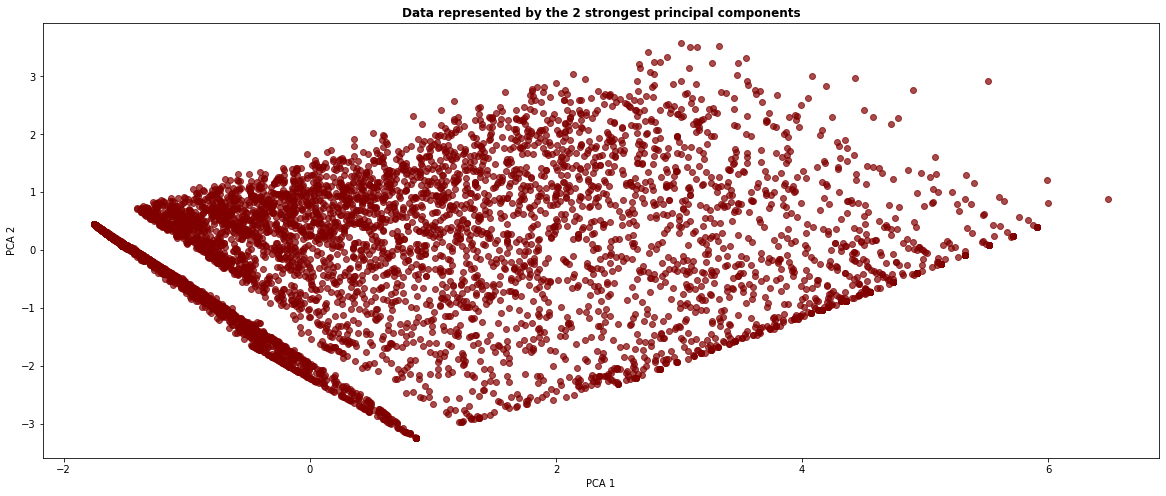

In [26]:
# plotting 2 component with high percentage of data preserved

plt.figure(figsize=(20,8))
plt.scatter(PCA_balcomponents[0], PCA_balcomponents[1], alpha=.7, color='maroon')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
plt.show()

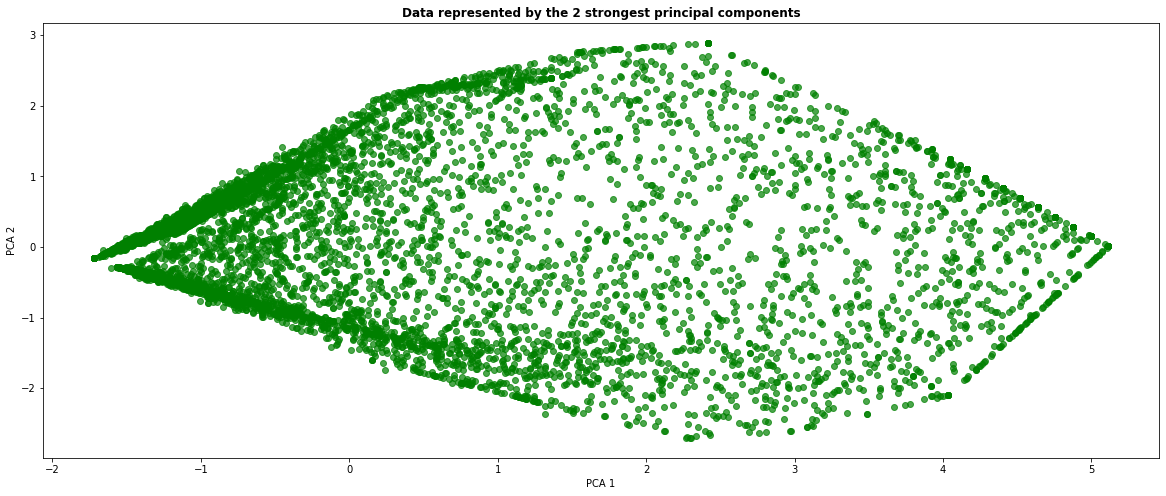

In [27]:
# plotting 2 component with high percentage of data preserved

plt.figure(figsize=(20,8))
plt.scatter(PCA_purcomponents[0], PCA_purcomponents[1], alpha=.7, color='green')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
plt.show()

# 7. Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

### 7.1 Elbow Method

In [28]:
# fit k-means using previous transformed data in PCA Balance
wcss = []
for i in range(1, 13):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans_pca.fit(pca_balcom)
    wcss.append(kmeans_pca.inertia_)



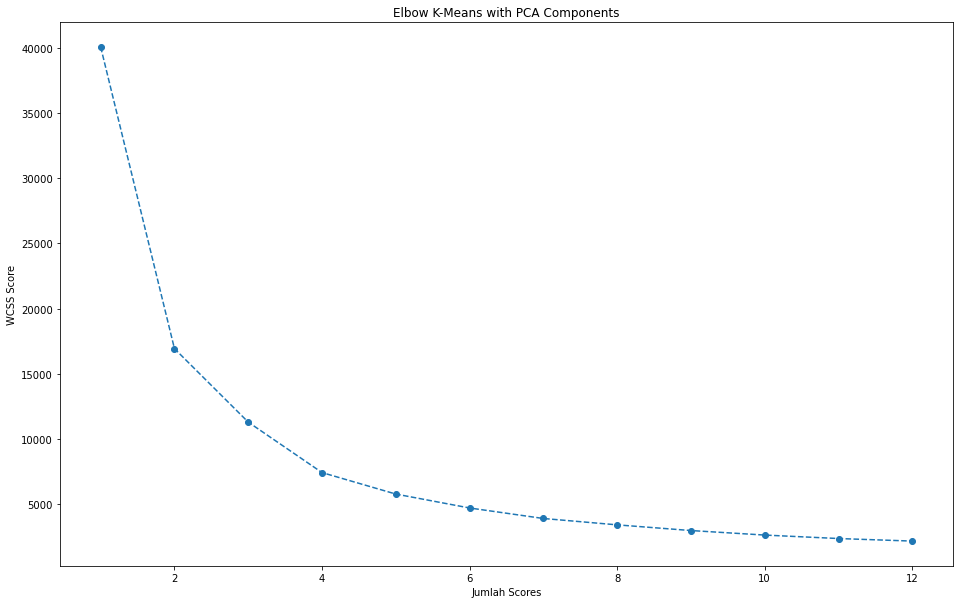

In [29]:
# plotting the wcss
plt.figure(figsize=(16,10))
plt.plot(range(1, 13), wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Scores')
plt.ylabel('WCSS Score')
plt.title('Elbow K-Means with PCA Components')
plt.show()



In [30]:
# fit k-means using previous transformed data in PCA Purchase
wcss1 = []
for i in range(1, 13):
    kmeans_pca1 = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans_pca1.fit(pca_purcom)
    wcss1.append(kmeans_pca1.inertia_)

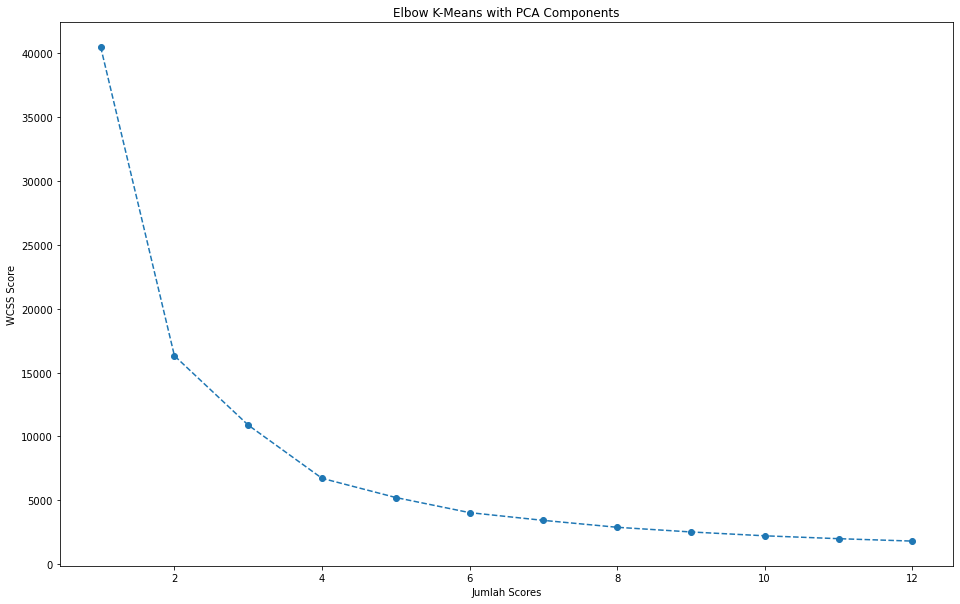

In [31]:
# plotting the wcss1
plt.figure(figsize=(16,10))
plt.plot(range(1, 13), wcss1, marker='o', linestyle='--')
plt.xlabel('Jumlah Scores')
plt.ylabel('WCSS Score')
plt.title('Elbow K-Means with PCA Components')
plt.show()


#### 7.2 Sillouette Score

In [32]:
kmeans_per_k_bal = [KMeans(n_clusters=k, random_state=42).fit(pca_balcom)
                for k in range(1, 10)]
silhouette_scores_bal = [silhouette_score(pca_balcom, model.labels_)
                     for model in kmeans_per_k_bal[1:]]

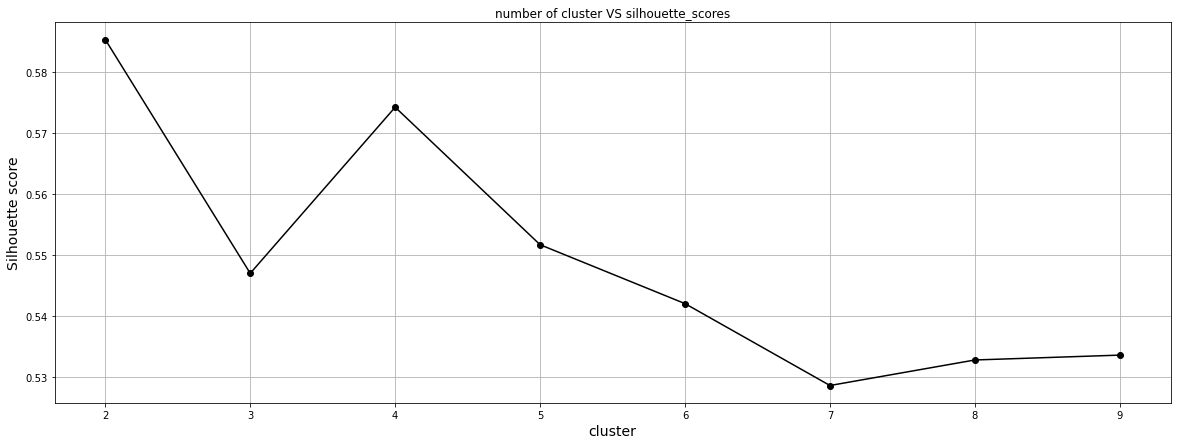

In [33]:
# Plot silhoutte score vs jumlah cluster in Balance

plt.figure(figsize=(20, 7))
plt.plot(range(2, 10), silhouette_scores_bal, marker='o', color= 'black')
plt.title('number of cluster VS silhouette_scores')
plt.xlabel("cluster", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.grid()
plt.show()

- Exp : 
    > Dapat diketahui jika cluster = 2 maka silhoutte score-nya adalah > 58%. Hal ini jauh lebih baik dibandingkan dengan cluster n=3 dengan score 54-55 %. Semakin mendekati 1 nilai silhoutte score, cluster yang terbentuk akan semakin berjarak dengan baik. Oleh karena itu selanjutnya pada kasus ini akan menggunakan cluster = 2.

In [34]:
kmeans_per_k_pur = [KMeans(n_clusters=k, random_state=42).fit(pca_purcom)
                for k in range(1, 10)]
silhouette_scores_pur = [silhouette_score(pca_purcom, model.labels_)
                     for model in kmeans_per_k_pur[1:]]

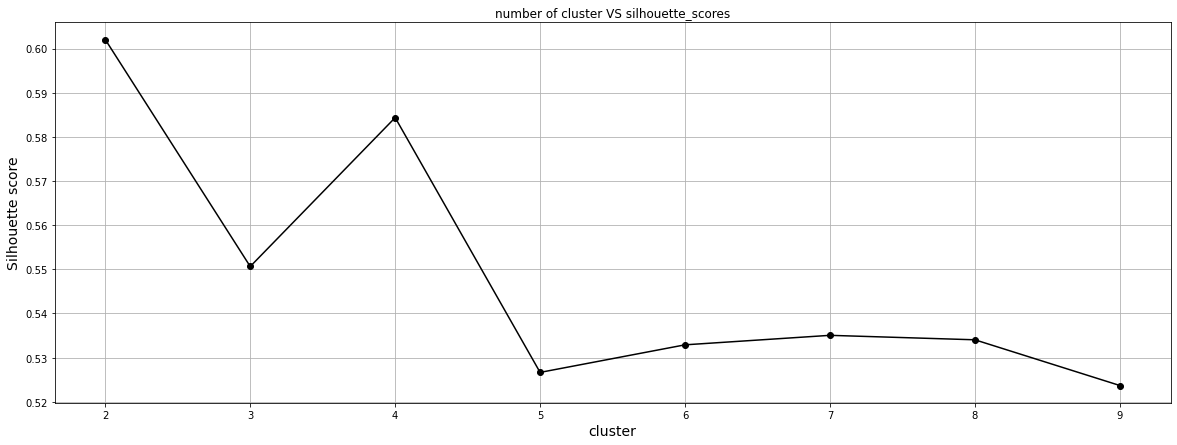

In [35]:
# Plot silhoutte score vs jumlah cluster in Purchase

plt.figure(figsize=(20, 7))
plt.plot(range(2, 10), silhouette_scores_pur, marker='o', color= 'black')
plt.title('number of cluster VS silhouette_scores')
plt.xlabel("cluster", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.grid()
plt.show()

- Exp : 
    > Dapat diketahui jika cluster = 2 maka silhoutte score-nya adalah > 60%. Hal ini jauh lebih baik dibandingkan dengan cluster n=3 dengan score 55 %. Semakin mendekati 1 nilai silhoutte score, cluster yang terbentuk akan semakin berjarak dengan baik. Oleh karena itu selanjutnya pada kasus ini akan menggunakan cluster = 2.

#### 7.3 Model Definition

In [36]:
# Model Definition
kmeans_pca_df1 = KMeans(n_clusters=2, init='k-means++', random_state=3)

kmeans_pca_df2 = KMeans(n_clusters=2, init='k-means++', random_state=3)

# 8. Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [37]:
# model Training Balance
kmeans_bal = kmeans_pca_df1.fit(pca_balcom)

In [38]:
# model Training Purchae
kmeans_pur = kmeans_pca_df2.fit(pca_purcom)

# 9. Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.

In [39]:
#predict the labels of clusters.

label_bal = kmeans_pca_df1.fit_predict(pca_balcom)

label_pur = kmeans_pca_df2.fit_predict(pca_purcom)

In [40]:
# create new dataframe Balance
df_new_bal = pd.DataFrame(pca_balcom)
df_new_bal.columns = ['Component 1', 'Component 2']
df_new_bal['Label K-Means PCA'] = label_bal

In [41]:
# create new dataframe Purchase
df_new_pur = pd.DataFrame(pca_purcom)
df_new_pur.columns = ['Component 1', 'Component 2']
df_new_pur['Label K-Means PCA'] = label_pur

In [42]:
# getting the centroids Balance
centroid_bal = kmeans_pca_df1.cluster_centers_
center_bal = pd.DataFrame(centroid_bal)
center_bal.columns = ['Component 1', 'Component 2']
center_bal

,Component 1,Component 2
0,-0.965163,-0.089160
1,2.663330,0.246034


In [43]:
# getting the centroids Purchase
centroid_pur = kmeans_pca_df2.cluster_centers_
center_pur = pd.DataFrame(centroid_pur)
center_pur.columns = ['Component 1', 'Component 2']
center_pur

,Component 1,Component 2
0,-0.966002,0.041017
1,2.795346,-0.118692


### 9.2 Hasil visualisasi jika mencari jumlah cluster dengan elbow method :

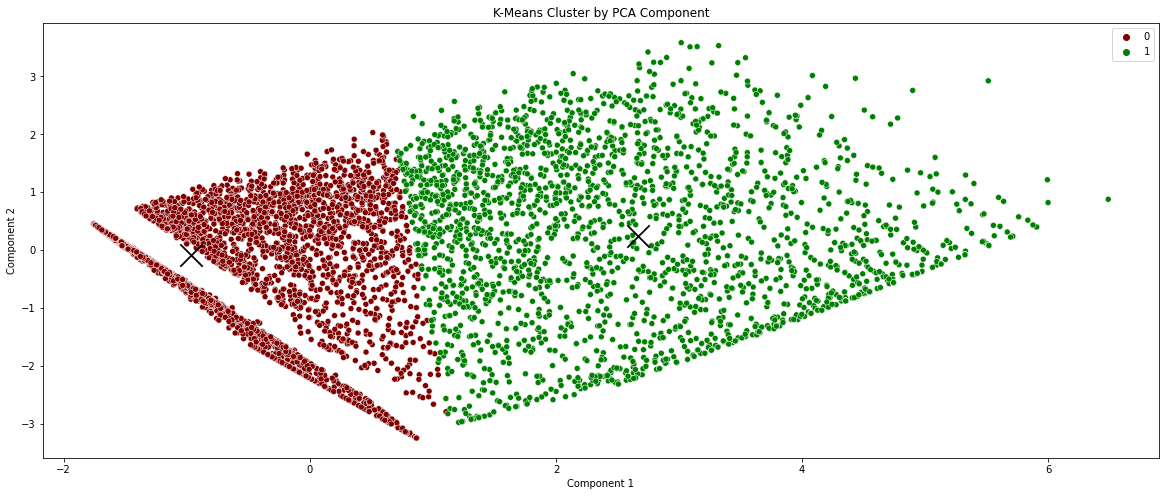

In [44]:
# plot data Balance K-Means clusters 

x_axis = df_new_bal['Component 1']
y_axis = df_new_bal['Component 2']
plt.figure(figsize=(20,8))
sns.scatterplot(data=df_new_bal ,x= x_axis, y= y_axis, hue = df_new_bal['Label K-Means PCA'], palette=['maroon','Green'])
sns.scatterplot(data=center_bal, x = center_bal['Component 1'], y = center_bal['Component 2'], marker='x', s=500, linewidths=5, color='black')
plt.title('K-Means Cluster by PCA Component')
plt.show()

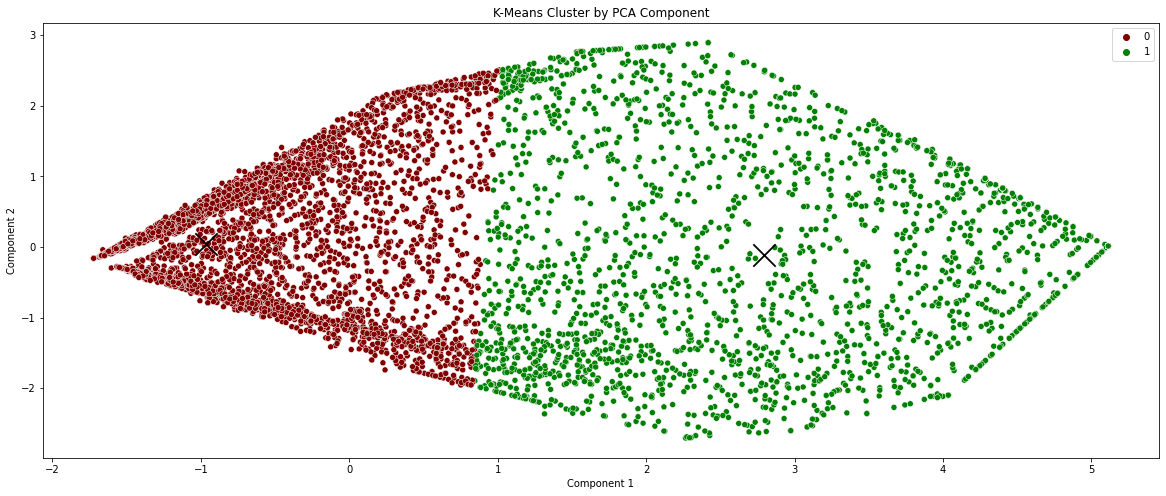

In [45]:
# plot data purchase K-Means clusters 

x_axis = df_new_pur['Component 1']
y_axis = df_new_pur['Component 2']
plt.figure(figsize=(20,8))
sns.scatterplot(data=df_new_pur ,x= x_axis, y= y_axis, hue = df_new_pur['Label K-Means PCA'], palette=['maroon','Green'])
sns.scatterplot(data=center_pur, x = center_pur['Component 1'], y = center_pur['Component 2'], marker='x', s=500, linewidths=5, color='black')
plt.title('K-Means Cluster by PCA Component')
plt.show()

# 10. Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [46]:
# load data inference

df_inf.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10061,5493.904060,1.000000,229.00,0.0,229.00,970.591332,0.416667,0.0,0.333333,0.333333,4,6,6000.0,2110.557023,1895.026170,0.000000,12
1,C16127,18.105265,1.000000,244.92,0.0,244.92,0.000000,1.000000,0.0,1.000000,0.000000,0,12,2500.0,221.798291,179.182583,0.333333,12
2,C13555,2075.637866,0.454545,0.00,0.0,0.00,4573.876388,0.000000,0.0,0.000000,0.083333,1,0,7500.0,1146.220278,1448.097316,0.000000,12
3,C14524,0.000000,0.000000,18.77,0.0,18.77,0.000000,0.083333,0.0,0.083333,0.000000,0,1,5000.0,0.000000,NaN,0.000000,12
4,C12878,58.142915,0.400000,0.00,0.0,0.00,151.730077,0.000000,0.0,0.000000,0.100000,1,0,1200.0,79.965023,136.403124,0.000000,10


In [47]:
# Memecah data menjadi 2 kelompok balance dan purchase
# Balance
inf_bal = df_inf[balance]

#Purchase
inf_pur = df_inf[purchase]

In [48]:
# check the missing values
inf_bal.isnull().sum()

BALANCE                   0
CASH_ADVANCE              0
CASH_ADVANCE_FREQUENCY    0
CASH_ADVANCE_TRX          0
MINIMUM_PAYMENTS          1
dtype: int64

In [49]:
# Mengisi kolom Missing pada tipe data object pada data Inference
imputer.fit(inf_bal)
X = imputer.transform(inf_bal)

bal_inf = pd.DataFrame(X, columns=inf_bal.columns, index=inf_bal.index)
print (bal_inf.shape)
bal_inf.isnull().sum()

(10, 5)


BALANCE                   0
CASH_ADVANCE              0
CASH_ADVANCE_FREQUENCY    0
CASH_ADVANCE_TRX          0
MINIMUM_PAYMENTS          0
dtype: int64

In [50]:
# check the missing values
inf_pur.isnull().sum()

PURCHASES                     0
ONEOFF_PURCHASES              0
INSTALLMENTS_PURCHASES        0
ONEOFF_PURCHASES_FREQUENCY    0
PURCHASES_TRX                 0
dtype: int64

- Exp :
    > tidak ada missing value pada data purchase

In [51]:
# Scaled the data inference
bal_inf_scaled = scaler.transform(bal_inf)

In [52]:
# Scaled the data inference
pur_inf_scaled = scaler.transform(inf_pur)

In [53]:
# dimentionality using PCA
inf_pca_balance = pca.transform(bal_inf_scaled)

inf_pca_purchase = pca.transform(pur_inf_scaled)

In [54]:
# create new dataframe using data_inf_pca

data_inf_bal = pd.DataFrame(inf_pca_balance, columns=['Component 1', 'Component 2'])
data_inf_bal

,Component 1,Component 2
0,77.316717,25.751594
1,4.844185,2.946512
2,57.906114,19.551025
3,12.533614,6.592685
4,4.858155,0.436338
5,19.876104,4.462260
6,21.715972,-2.379631
7,6.576676,3.678718
8,25.150362,12.370144
9,12.642206,3.421782


In [55]:
# create new dataframe using data_inf_pca

data_inf_pur = pd.DataFrame(inf_pca_purchase, columns=['Component 1', 'Component 2'])
data_inf_pur

,Component 1,Component 2
0,-1.160295,0.375451
1,-0.916984,0.509493
2,-1.721993,-0.160742
3,-1.657360,-0.107984
4,-1.721993,-0.160742
5,2.309941,-2.522848
6,-1.333861,-0.403858
7,5.370780,-0.756699
8,-1.492686,0.013373
9,-1.721993,-0.160742


In [56]:
# Predict the label for data_inference

label_infbal = kmeans_pca_df1.predict(data_inf_bal)
label_infpur = kmeans_pca_df2.predict(data_inf_pur)

In [57]:
# create new dataframe

inf_newbal = pd.DataFrame(data_inf_bal)
inf_newbal.columns = ['Component 1', 'Component 2']
inf_newbal['Label K-Means PCA'] = label_infbal

In [58]:
inf_newbal

,Component 1,Component 2,Label K-Means PCA
0,77.316717,25.751594,1
1,4.844185,2.946512,1
2,57.906114,19.551025,1
3,12.533614,6.592685,1
4,4.858155,0.436338,1
5,19.876104,4.462260,1
6,21.715972,-2.379631,1
7,6.576676,3.678718,1
8,25.150362,12.370144,1
9,12.642206,3.421782,1


In [59]:
# create new dataframe

inf_newpur = pd.DataFrame(data_inf_pur)
inf_newpur.columns = ['Component 1', 'Component 2']
inf_newpur['Label K-Means PCA'] = label_infpur

In [60]:
inf_newpur

,Component 1,Component 2,Label K-Means PCA
0,-1.160295,0.375451,0
1,-0.916984,0.509493,0
2,-1.721993,-0.160742,0
3,-1.657360,-0.107984,0
4,-1.721993,-0.160742,0
5,2.309941,-2.522848,1
6,-1.333861,-0.403858,0
7,5.370780,-0.756699,1
8,-1.492686,0.013373,0
9,-1.721993,-0.160742,0


# 11. Pengambilan Kesimpulan

> Pada bagian terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan *objective* yang sudah ditulis di bagian pengenalan.

- Exp :
    > Dataset ini mempunyai karakteristik yang berbeda antara pemakaian kartu kredit dengan cash advance (tarik tunai) dan pemakaian kartu kredit dengan pembelian (beli barang)
    > sehingga saya membagikan menjadi 2 kelompok yang berbeda antara Balance dan purchase
    > dengan melakukan PCA saya mengambil 2 komponen terbaik
    > dari 2 komponen tersebut dengan menggunakan elbow method, saya dapat mendifinisikan menjadi 3 cluster
    > sedangkan dengan menggunakan sillouette score cluster terbaik hanya dibagi menjadi 2 jadi saya memustuskan menggunakan 2 cluster